# Unterschwingungsverfahren (sinusbewertete Pulsweitenmodulation)
- Drei sinusförmige „Strangspannungen“ werden in der für den Motor „gewünschten“ Ausgabefrequenz (z.B. 50 Hz) in der Steuerung generiert.
- Die Frequenz der Dreieckspannung entspricht der parametrierten Pulsfrequenz (hier zur Vereinfachung 300 Hz).
- Es wird jeweils eine sinusförmige Spannung mit der Dreieckspannung verglichen.

In [1053]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib inline

In [1054]:
# Einstellungen
freq_dreieck = 6 # Frequenzmultiplikator für die Dreiecksfunktion
amp_dreieck = 1.2 # Amplitude der Dreiecksfunktion
anzahl_werte = 600 # Anzahl der Schritte innerhalb einer 1/2 Periode
zeige_neg_schalter = 1 # Zeige alle IGBT's
plot_y_abstand = 1.5 # Vertikaler Abstand zwischen den Kurven
sin_offset = math.radians(-10) # Verschiebung der Sinuskurven
#https://mybinder.org/v2/gh/ipython/ipython-in-depth/7e5ce96cc9251083979efdfc393425f1229a4a68

In [1055]:
def triangle(x,amp,s):
    y = 0.0
    s = amp / (len(x)/4) * s
    for xvalue in x :
        yield y
        y += s
        if abs(y) >= amp:
            s *=-1
            

In [1056]:
x = np.arange(0, math.pi*2, math.pi / anzahl_werte)
UVergl_U = np.sin(x+sin_offset)
UVergl_V = np.sin(x-math.pi*2/3+sin_offset)
UVergl_W = np.sin(x-math.pi*2/3*2+sin_offset)
tri = np.fromiter(triangle(x,amp_dreieck, freq_dreieck), float)

#print(len(x), len(tri))

## Darstellung der Spannungsverläufe:

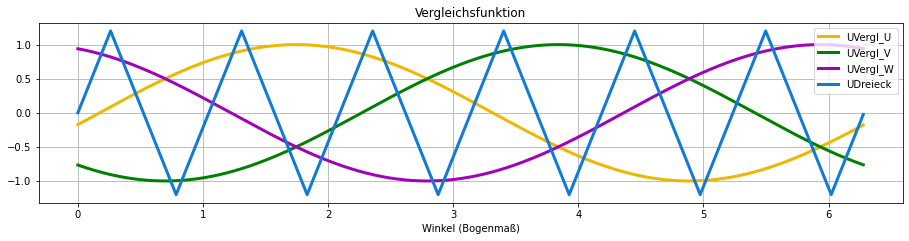

In [1057]:
fig=plt.figure(figsize=(12,2.5))
ax=fig.add_axes([0,0,1,1])
ax.plot(x, UVergl_U, c='#efb700', lw=3, label='UVergl_U')
ax.plot(x, UVergl_V, c='green', lw=3, label='UVergl_V')
ax.plot(x, UVergl_W, c='#a101ba', lw=3, label='UVergl_W')
ax.plot(x, tri, c='#0f7ad8', lw=3, label='UDreieck')
ax.grid('grey')
ax.legend()

ax.set_title("Vergleichsfunktion")
ax.set_xlabel('Winkel (Bogenmaß)')
fig.savefig('verlaeufe.png',bbox_inches='tight')

In [1058]:
def vergleiche(i,t):
    for index,value in enumerate(i):
        if value > t[index]:
            yield 1
        else:
            yield 0

def umkehren(i):
    for value in i:
        if value >= 1:
            yield 0
        else:
            yield 1

In [1059]:
Q1 = np.fromiter(vergleiche(UVergl_U,tri), int)
Q3 = np.fromiter(vergleiche(UVergl_V,tri), int)
Q5 = np.fromiter(vergleiche(UVergl_W,tri), int)
Q4 = np.fromiter(umkehren(Q1), int)
Q6 = np.fromiter(umkehren(Q3), int)
Q2 = np.fromiter(umkehren(Q5), int)

## Auswertung:
Das Diagramm zeigt die Ansteuerung der einzelnen IGBT's

U<sub>Vergl_U</sub> , U<sub>Vergl_V</sub> bzw. U<sub>Vergl_W</sub> werden mit der Dreieckspannung U<sub>Δ</sub> verglichen. Wenn die Sinusspannungen größer als die Dreieckspannung sind, dann steuern die IGBTs Q1, Q3 bzw. Q5 durch und legen ein positives Potenzial auf den jeweiligen Ausgang der Strangspannung. Wenn Q1, Q3 oder Q5 nicht durchgesteuert sind, dann legen die den entsprechen Strang zugeordneten IGBTs (Q4, Q6 und Q2) das negative Potenzial auf den Ausgang des Wechselrichters.

### Schalter:

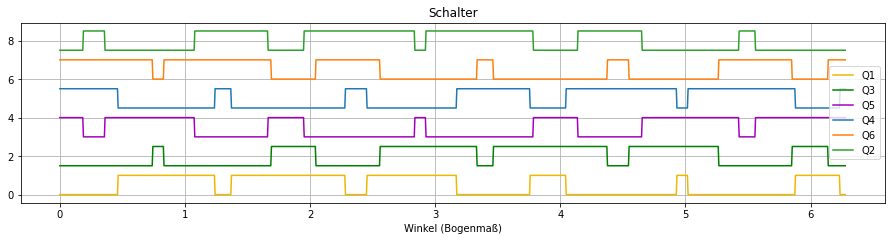

In [1060]:
#zeige_neg_schalter = 1 # Zeige alle Q's

fig_schalter=plt.figure(figsize=(12,2.5))
bx=fig_schalter.add_axes([0,0,1,1])
bx.plot(x,Q1, '#efb700', label='Q1')
bx.plot(x,Q3+plot_y_abstand, 'green', label='Q3')
bx.plot(x,Q5+plot_y_abstand*2, '#a101ba', label='Q5')
if zeige_neg_schalter :
    bx.plot(x,Q4+plot_y_abstand*3, label='Q4')
    bx.plot(x,Q6+plot_y_abstand*4, label='Q6')
    bx.plot(x,Q2+plot_y_abstand*5, label='Q2')

bx.set_title("Schalter")
bx.set_xlabel('Winkel (Bogenmaß)')
bx.grid('grey')
bx.legend()

fig_schalter.savefig('schalter.png', bbox_inches='tight')

In [1061]:
U1n = np.zeros(anzahl_werte*2)
U2n = np.zeros(anzahl_werte*2)
U3n = np.zeros(anzahl_werte*2)

In [1062]:
for i,v in enumerate(U1n) :
    if Q1[i] and Q5[i] and Q6[i] :
        U1n[i] = 1/3
        U2n[i] = -2/3
        U3n[i] = 1/3
    elif Q1[i] and Q2[i] and Q6[i] :
        U1n[i] = 2/3
        U2n[i] = -1/3
        U3n[i] = -1/3
    elif Q1[i] and Q2[i] and Q3[i] :
        U1n[i] = 1/3
        U2n[i] = 1/3
        U3n[i] = -2/3
    elif Q2[i] and Q3[i] and Q4[i] :
        U1n[i] = -1/3
        U2n[i] = 2/3
        U3n[i] = -1/3
    elif Q3[i] and Q4[i] and Q5[i] :
        U1n[i] = -2/3
        U2n[i] = 1/3
        U3n[i] = 1/3
    elif Q4[i] and Q5[i] and Q6[i] :
        U1n[i] = -1/3
        U2n[i] = -1/3
        U3n[i] = 2/3

#n = 50
#print(U1n[n:n+5])
#print(Q1[n:n+5])
#print(Q2[n:n+5])
#print(Q3[n:n+5])
#print(Q4[n:n+5])
#print(Q5[n:n+5])
#print(Q6[n:n+5])

### Strangspannungen:

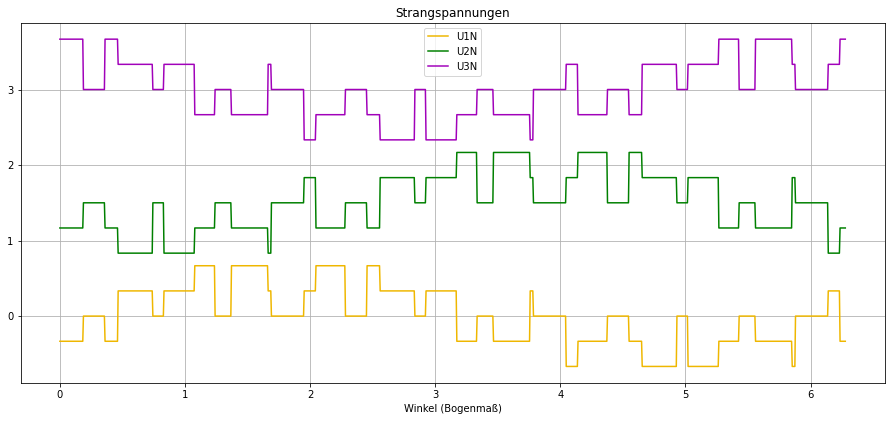

In [1063]:
# Plot Werte
fig_spannung=plt.figure(figsize=(12,5))
dx=fig_spannung.add_axes([0,0,1,1])
dx.plot(x,U1n, '#efb700', label='U1N')
dx.plot(x,U2n+plot_y_abstand*1, 'green', label='U2N')
dx.plot(x,U3n+plot_y_abstand*2, '#a101ba', label='U3N')

dx.set_title("Strangspannungen")
dx.set_xlabel('Winkel (Bogenmaß)')
dx.grid('grey')
dx.legend()

fig_spannung.savefig('Strangspannungen.png', bbox_inches='tight')

In [1064]:
U12 = np.subtract(U1n,U2n)
U23 = np.subtract(U2n,U3n)
U31 = np.subtract(U3n,U1n)
#print(U12[0:300])

### Verkettete Spannungen:

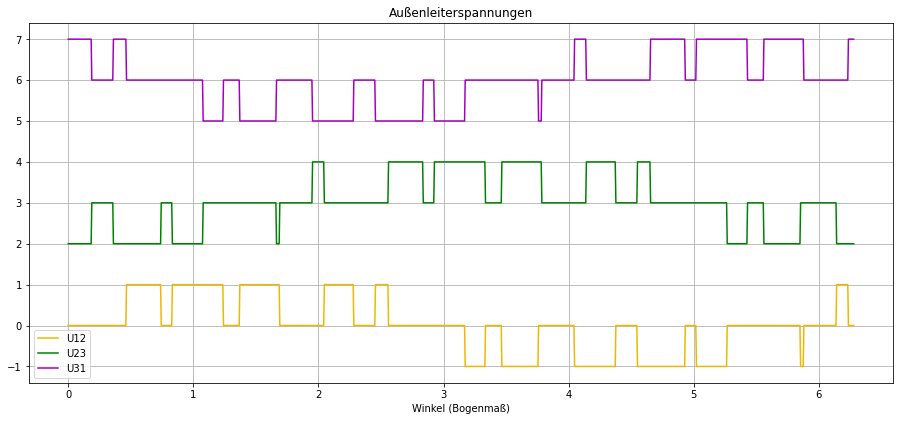

In [1065]:
fig_aussen=plt.figure(figsize=(12,5))
ex=fig_aussen.add_axes([0,0,1,1])
ex.plot(x,U12, '#efb700', label='U12')
ex.plot(x,U23+plot_y_abstand*2, 'green', label='U23')
ex.plot(x,U31+plot_y_abstand*4, '#a101ba', label='U31')

ex.set_title("Außenleiterspannungen")
ex.set_xlabel('Winkel (Bogenmaß)')
ex.grid('grey')
ex.legend()
fig_aussen.savefig('Aussenleiterspannungen_'+str(amp_dreieck)+'_' +str(freq_dreieck)+'.png', bbox_inches='tight')